## Compare detected face locations in different pliers face detection methods


### Tools that detect faces:

* Google Cloud Vision API
* Clarifai
* pliers itself


### Common measures
* boundaries of faces


### Ways to assess similarity
* Eucledian distance between coordinates?

In [9]:
import numpy as np
from os.path import join as opj
from pliers.extractors import (ClarifaiAPIImageExtractor,
                               FaceRecognitionFaceLocationsExtractor, 
                               GoogleVisionAPIFaceExtractor)
from pliers.stimuli import ImageStim

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib import patches as patches

In [13]:
# awful hardcoded path to a test image
img_pth = opj('../', 'data', 'obama.jpg')
stim = ImageStim(img_pth)


In [14]:
# the results of the face detection are given relative to stimulus size. Let's get the image dimensions in pixel
y, x = stim.data.shape[:2]
print(f'the picture is {x} pixel x {y} pixel in size')

the picture is 444 pixel x 600 pixel in size


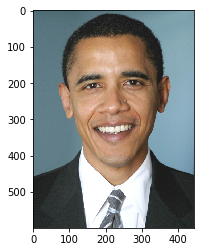

In [15]:
# let's also see what the picture looks like
fig,ax = plt.subplots(1)
plt_img = mpimg.imread(img_pth)
imgplot = ax.imshow(plt_img)

plt.show()


### pliers face detection

In [4]:
ext_pliers = FaceRecognitionFaceLocationsExtractor()
result_pliers = ext_pliers.transform(stim).to_df()
top, right, bottom, left = result_pliers['face_locations'][0]
print(top, right, bottom, left)

142 349 409 82


In [5]:
# transform css coordinates into pixel
top_row = y - top
bottom_row = y - bottom
left_col = x - left
right_col = x - right
print(top_row, right_col, bottom_row, left_col)


458 95 191 362


### clarifai face detection

In [6]:
# the clarifai extraction needs a model and an api key
model='face' 
ext_clarifai = ClarifaiAPIImageExtractor(api_key='d53d5755b7514b87877df990f2d0bbd4',
                                         model=model)
result_clarifai = ext_clarifai.transform(stim).to_df()


In [7]:
print(result_clarifai)

   order  duration  onset  object_id   top_row  left_col  bottom_row  \
0    NaN       NaN    NaN          0  0.118024  0.220802    0.717073   

   right_col  
0   0.788294  


In [8]:
# transform relative coordinates into pixel
top_row = y - y * result_clarifai['top_row'][0]
bottom_row = y - y * result_clarifai['bottom_row'][0]
left_col = x - x * result_clarifai['left_col'][0]
right_col = x - x * result_clarifai['right_col'][0]
print(top_row, right_col, bottom_row, left_col)

529.1857168078423 93.99742984771729 169.75643634796143 345.9639807343483


### Google Cloud vision API face detection

In [18]:
ext_google = GoogleVisionAPIFaceExtractor(discovery_file='/home/adina/NeuroHackademy-02c15db15c2a.json')
result_google = ext_google.transform(stim).to_df()

W0807 21:04:58.198044 140090669545280 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/home/adina/env/neurohackademy/lib/python3.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/adina/env/neurohackademy/lib/python3.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/adina/env/neurohackademy/lib/python3.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 3

In [19]:
result_google

,order,duration,onset,object_id,boundingPoly_vertex1_x,boundingPoly_vertex1_y,boundingPoly_vertex2_x,boundingPoly_vertex2_y,boundingPoly_vertex3_x,boundingPoly_vertex3_y,...,tiltAngle,face_detectionConfidence,face_landmarkingConfidence,joyLikelihood,sorrowLikelihood,angerLikelihood,surpriseLikelihood,underExposedLikelihood,blurredLikelihood,headwearLikelihood
0,NaN,NaN,NaN,0,34,3,413,3,413,444,...,-2.058331,0.999946,0.84057,VERY_LIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY


In [23]:
result_google.to_dict(orient='records')
# vertex coordinates are in the same scale as the original image.
# vertices are in order top-left, top-right, bottom-right, bottom-left.
top_left = result_google['boundingPoly_vertex1_x']
top_right = result_google['boundingPoly_vertex2_x']
bottom_right = result_google['boundingPoly_vertex3_x']
bottom_left = result_google['boundingPoly_vertex4_x']